In [1]:
import numpy as np
import pandas as pd
from cv2 import imread
import ml_utils as ml
import matplotlib.pyplot as plt

import h5py
from numpy.core.defchararray import add

import cv2
import tensorflow as tf
from tensorflow import keras
import tensorflow.keras.backend as K
from tensorflow.keras import optimizers
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import (Input,Dense,Flatten, 
                                     Conv2D ,MaxPool2D,
                                     GlobalAvgPool2D,
                                     Activation, Dropout,
                                     concatenate, ReLU,LeakyReLU,
                                    Lambda,BatchNormalization,
                                    SeparableConv2D)
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import (ModelCheckpoint,
                                        EarlyStopping)
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix,accuracy_score

In [2]:
!which ipython

~/.conda/envs/tensorflowenvpy39/bin/ipython


# Loading Data

In [3]:
data_dir_old = '/home/srashti.goyal/alice_data_lensid/qts/train/'
data_dir_ml2p0 = '/home/srashti.goyal/lensid_runs/ML_2p0_AnalyticalPsd/data/qts/train/'

In [4]:
data_dir_ml1p0 = '/home/srashti.goyal/lensid_runs/ML_1p0_AnalyticalPsd/data/qts/train/'


In [5]:
mode = 'ml1p0' # old, 'ml1p0', 'ml2p0','ml1p0_qmode2','ml1p0_whiten'



# Training

In [6]:
lensed_df = '/home/srashti.goyal/lensid_runs/ML_2p0_AnalyticalPsd/data/dataframes/train/lensed.csv'

In [7]:
lensed_df_old = '../lensed_old.csv'

In [8]:
unlensed_df = '/home/srashti.goyal/lensid_runs/ML_2p0_AnalyticalPsd/data/dataframes/train/unlensed_half.csv'

In [9]:
df_lensed = pd.read_csv(lensed_df)#pd.read_csv("/kaggle/input/q-tranforms-mat-gen-scripts/Lensed_full_qtransforms/Lensed_dataset_full.csv" )
df_lensed=df_lensed.drop(columns=['Unnamed: 0'])
df_lensed.tail()

,img_0,img_1,Lensing
2808,2808_0,2808_1,1
2809,2809_0,2809_1,1
2810,2810_0,2810_1,1
2811,2811_0,2811_1,1
2812,2812_0,2812_1,1


In [10]:
df_unlensed = pd.read_csv(unlensed_df)#pd.read_csv("/kaggle/input/q-tranforms-mat-gen-scripts/Unlensed_full_qtransforms/Unlensed_dataset_full.csv" )
df_unlensed=df_unlensed.drop(columns=['Unnamed: 0'])
df_unlensed.tail()

,img_0,img_1,Lensing
124745,496,498,0
124746,496,499,0
124747,497,498,0
124748,497,499,0
124749,498,499,0


In [11]:
# size of the training dataset
size=1410 # for each lensed and unlensed

# to choose test dataset different from the train one remember this random state.
df_unlensed=df_unlensed.sample(frac = 1,random_state = 42).reset_index(drop = True)[:size]
df_lensed=df_lensed[:size]

# training data set
df_train = pd.concat([df_lensed,df_unlensed],ignore_index = True)
df_train=df_train.sample(frac = 1,random_state = 42).reset_index(drop = True)[:2*size]
df_train

,img_0,img_1,Lensing
0,1090_0,1090_1,1
1,84,91,0
2,772_0,772_1,1
3,1110_0,1110_1,1
4,1,96,0
...,...,...,...
2815,275,366,0
2816,1095_0,1095_1,1
2817,1130_0,1130_1,1
2818,1294_0,1294_1,1


In [13]:
det='H1'
X, y, missing_ids=ml.generate_resize_densenet_fm(df_train).DenseNet_input_matrix(
        det,
        data_mode_dense="current",
        data_dir=data_dir_ml1p0)

In [15]:
dense_model_trained = ml.train_densenet(X,y,det,20, 0.01) #20,0.01, .005


2022-09-11 03:31:27.840367: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-11 03:31:29.852048: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 77870 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-80GB, pci bus id: 0000:01:00.0, compute capability: 8.0
2022-09-11 03:31:29.853494: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 76749 MB memory:  -> device: 1, name: NVIDIA A100-SXM4-80GB, pci bus id: 0000:41:00.0, compute capability: 8.0
2022-09-11 03:31:29.854678: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/devi

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet201 (Functional)    (None, 4, 4, 1920)        18321984  
                                                                 
 global_average_pooling2d (G  (None, 1920)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 256)               491776    
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 18,814,017
Trainable params: 18,584,961
Non-trainable params: 229,056
_________________________________________________________________

Epoch 1: LearningRateScheduler setting learning rate to 1e-05.
Epoch 1/20


2022-09-11 03:31:48.659272: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100
2022-09-11 03:31:49.288296: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-09-11 03:31:50.529967: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


71/71 [==============================] - 27s 160ms/step - loss: 5.6128 - accuracy: 0.7194 - val_loss: 5.6411 - val_accuracy: 0.6064 - lr: 1.0000e-05

Epoch 2: LearningRateScheduler setting learning rate to 8.8e-05.
Epoch 2/20
71/71 [==============================] - 6s 91ms/step - loss: 4.7636 - accuracy: 0.8870 - val_loss: 4.6378 - val_accuracy: 0.6011 - lr: 8.8000e-05

Epoch 3: LearningRateScheduler setting learning rate to 0.000166.
Epoch 3/20
71/71 [==============================] - 7s 94ms/step - loss: 3.4235 - accuracy: 0.9486 - val_loss: 3.2654 - val_accuracy: 0.6968 - lr: 1.6600e-04

Epoch 4: LearningRateScheduler setting learning rate to 0.000244.
Epoch 4/20
71/71 [==============================] - 6s 89ms/step - loss: 2.3210 - accuracy: 0.9167 - val_loss: 2.3899 - val_accuracy: 0.6348 - lr: 2.4400e-04

Epoch 5: LearningRateScheduler setting learning rate to 0.000322.
Epoch 5/20
71/71 [==============================] - 6s 89ms/step - loss: 1.4675 - accuracy: 0.9277 - val_loss:

NameError: name 'odir' is not defined

In [25]:
dense_model_trained.trainable=True
dense_model_trained.save('dense_'+det+'.h5')

In [17]:
# test 

df_unlensed = pd.read_csv(unlensed_df)#pd.read_csv("/kaggle/input/q-tranforms-mat-gen-scripts/Unlensed_full_qtransforms/Unlensed_dataset_full.csv" )
df_unlensed=df_unlensed.drop(columns=['Unnamed: 0'])
df_unlensed.tail()

,img_0,img_1,Lensing
124745,496,498,0
124746,496,499,0
124747,497,498,0
124748,497,499,0
124749,498,499,0


In [18]:
size_test = 400

# to choose test dataset different from the train one remember this random state.
df_unlensed=df_unlensed.sample(frac = 1,random_state = 42).reset_index(drop = True)[-size_test:]
df_lensed=df_lensed[-size_test:]

# testing data set
df_test = pd.concat([df_lensed,df_unlensed],ignore_index = True)
df_test=df_test.sample(frac = 1,random_state = 42).reset_index(drop = True)[:2*size_test]
df_test

,img_0,img_1,Lensing
0,2,22,0
1,108,185,0
2,1073_0,1073_1,1
3,233,469,0
4,1076_0,1076_1,1
...,...,...,...
795,1081_0,1081_1,1
796,1116_0,1116_1,1
797,1280_0,1280_1,1
798,176,447,0


In [20]:
det='H1'
X, y, missing_ids=ml.generate_resize_densenet_fm(df_test).DenseNet_input_matrix(
        det,
        data_mode_dense="current",
        data_dir=data_dir_ml1p0)

In [22]:
df_test['dense_'+det]=ml.Dense_predict(dense_model_trained, df_test, X, missing_ids)


25/25 [==============================] - 3s 26ms/step


DenseNet H1 auc = 0.9904


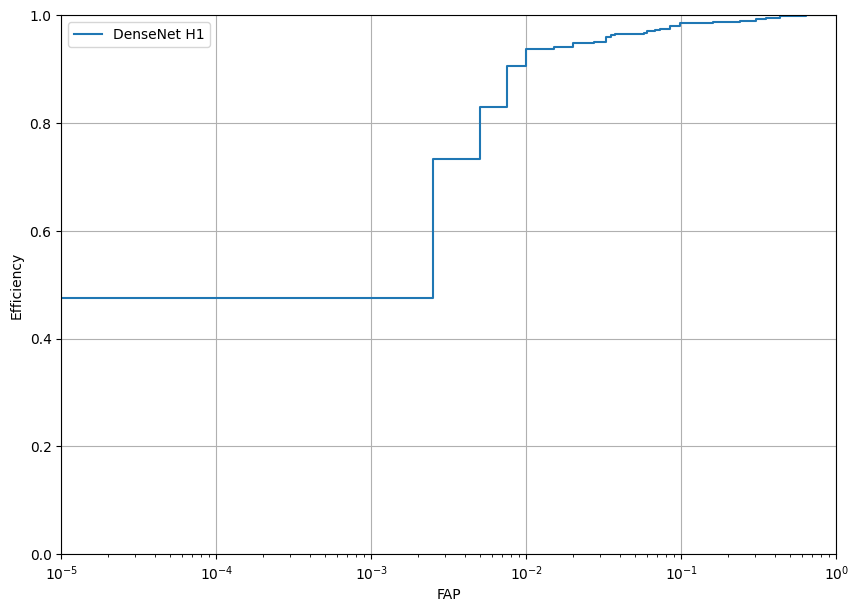

In [23]:
columns = ['dense_H1']
labels=['DenseNet H1']
fig,rocs=ml.plot_ROCs(df_test,cols=columns,labels=labels)

# Test with Haris et al.

In [26]:
#model_name='siamese_13082022_v1'

model = load_model('dense_H1.h5',)


In [27]:
data_dir_ml1p0_test = '/home/srashti.goyal/lensid_runs/ML_1p0_AnalyticalPsd/data/qts/test/'

test_df= '/home/srashti.goyal/lensid_runs/ML1p0_kaggle_results/dataframes/ML_combined_kaggle.csv'

In [28]:
df_test= pd.read_csv(test_df)#pd.read_csv('/kaggle/input/haris-et-al-with-all-features/Predictions_saved models haris et al 1.csv')
df_test.tail()

,Unnamed: 0,img_0,img_1,Lensing,bayestar_skymaps_blu,bayestar_skymaps_d2,bayestar_skymaps_d3,bayestar_skymaps_lsq,"m1, m2, ra, sin_dec, a1, a2, costilt1, costilt2, costheta_jn","m1, m2, ra, sin_dec, costheta_jn",...,densnet_xgbsky_bayestar_mul_3,densnet_xgbsky_bayestar_mul_4,densnet_xgbsky_bayestar_mul_5,densnet_xgbsky_bayestar_mul_6,densnet_xgbsky_bayestar_mul_7,densnet_xgbsky_bayestar_mul_8,densnet_xgbsky_bayestar_mul_9,densnet_xgbsky_bayestar_mul_10,densnet_xgbsky_bayestar_mul_0_fpp,"m1, m2, ra, sin_dec_fpp"
499787,499787,554245000.000000000-108490,595997000.000000000-191994,0,1.365422e-22,1.100924e-24,7.416256e-23,0.152882,1.703364e+00,1.306218e+00,...,5.617953e-11,5.323830e-11,3.781744e-11,5.754009e-11,4.617744e-11,5.093563e-11,5.437944e-11,4.355582e-11,0.820126,0.400813
499788,499788,653141000.000000000-306282,689564500.000000000-379129,0,1.604834e-11,1.293959e-13,1.824653e-11,0.142847,1.854477e-30,4.144270e-32,...,1.277932e-09,9.165771e-10,9.600741e-10,9.657164e-10,7.525222e-10,1.439519e-09,9.161058e-10,8.575772e-10,0.377858,0.900715
499789,499789,675816500.000000000-351633,588559000.000000000-177118,0,1.589665e+00,1.281728e-02,3.718310e-01,0.217838,6.472753e-06,6.622443e-06,...,2.947281e-10,3.003368e-10,2.703528e-10,3.278459e-10,2.761449e-10,3.409250e-10,3.003700e-10,2.169142e-10,0.468067,0.900711
499790,499790,599525500.000000000-199051,659585500.000000000-319171,0,7.492058e-01,6.040759e-03,1.743057e-02,0.094712,0.000000e+00,0.000000e+00,...,1.947911e-09,1.707155e-09,1.472434e-09,1.851704e-09,2.032786e-09,1.479124e-09,1.666960e-09,1.728036e-09,0.293131,1.000000
499791,499791,696527500.000000000-393055,597883000.000000000-195766,0,3.806309e-04,3.068983e-06,7.472681e-05,0.132500,4.854948e-03,9.256321e-03,...,1.270262e-08,1.760677e-08,1.613030e-08,1.972285e-08,1.262126e-08,2.006033e-08,1.477558e-08,1.330652e-08,0.156259,0.842162


In [29]:
df_test['dense_'+det] =''

In [30]:
dl=1400
l= len(df_test.Lensing.values)

for i in range(0,l,dl):
    if i + dl <= l :
        print(i)
        X, labels,missing_ids=ml.generate_resize_densenet_fm(df_test[i:i+dl]).DenseNet_input_matrix(
        det,
        data_mode_dense="current",
        data_dir=data_dir_ml1p0_test)
        df_test.loc[i:i+dl-1,'dense_'+det]=ml.Dense_predict(model, df_test, X, missing_ids)
    else:
        X, labels,missing_ids=ml.generate_resize_densenet_fm(df_test[i:l]).DenseNet_input_matrix(
        det,
        data_mode_dense="current",
        data_dir=data_dir_ml1p0_test)
        df_test.loc[i:l-1,'dense_'+det]=ml.Dense_predict(model, df_test, X, missing_ids)


0


/home/srashti.goyal/lensid/development/siamese/ml_utils.py:350: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["mean_overlap_qts_" + det],
/home/srashti.goyal/lensid/development/siamese/ml_utils.py:351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["std_overlap_qts_" + det],
/home/srashti.goyal/lensid/development/siamese/ml_utils.py:352: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

44/44 [==============================] - 4s 40ms/step
1400
44/44 [==============================] - 1s 25ms/step
2800
44/44 [==============================] - 1s 24ms/step
4200
44/44 [==============================] - 1s 25ms/step
5600
44/44 [==============================] - 1s 25ms/step
7000
44/44 [==============================] - 1s 25ms/step
8400
44/44 [==============================] - 1s 24ms/step
9800
44/44 [==============================] - 1s 23ms/step
11200
44/44 [==============================] - 1s 23ms/step
12600
44/44 [==============================] - 1s 25ms/step
14000
44/44 [==============================] - 1s 23ms/step
15400
44/44 [==============================] - 1s 23ms/step
16800
44/44 [==============================] - 1s 24ms/step
18200
44/44 [==============================] - 1s 24ms/step
19600
44/44 [==============================] - 1s 24ms/step
21000
44/44 [==============================] - 1s 24ms/step
22400
44/44 [==============================] - 1s 24m

In [32]:
df_test.to_csv('dense_H1_predictions_haris_etal.csv')

BLU masses+sky auc = 0.9916
ML sky auc = 0.9708
BLU masses auc = 0.9164
BLU sky auc = 0.9777
ML QTs auc = 0.9085
DenseNet H1 auc = 0.8790
dense H1 [this df] auc = 0.8806


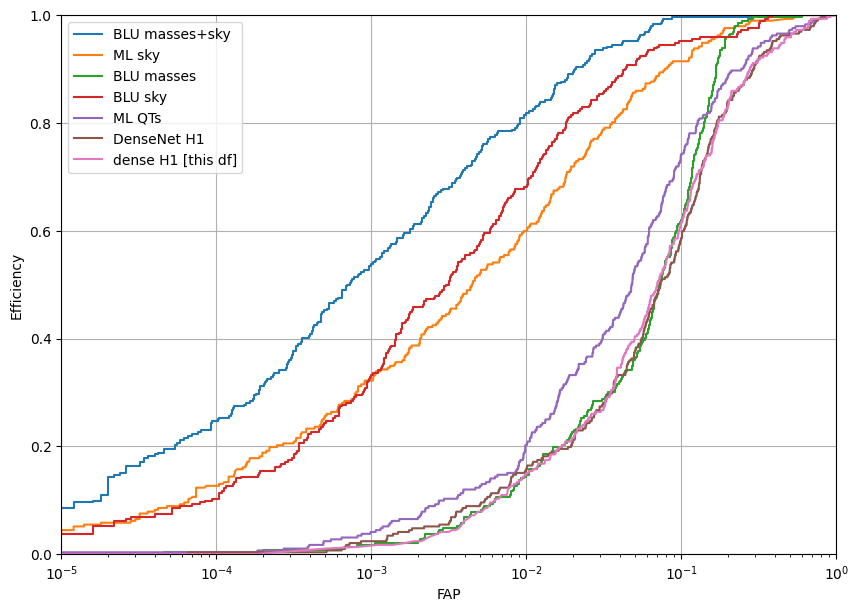

In [35]:
columns = ['m1, m2, ra, sin_dec, costheta_jn','xgb_pred_bayestar_skymaps','m1, m2','ra, sin_dec','xgb_dense_QTS_0','dense_H1_0','dense_H1']
labels=['BLU masses+sky','ML sky','BLU masses','BLU sky','ML QTs','DenseNet H1','dense H1 [this df]']
fig,rocs=ml.plot_ROCs(df_test,cols=columns,labels=labels)

# load haris-et al results

In [37]:


df_test=pd.read_csv('dense_H1_predictions_haris_etal.csv')

In [38]:
df_test.tail()

,Unnamed: 0.1,Unnamed: 0,img_0,img_1,Lensing,bayestar_skymaps_blu,bayestar_skymaps_d2,bayestar_skymaps_d3,bayestar_skymaps_lsq,"m1, m2, ra, sin_dec, a1, a2, costilt1, costilt2, costheta_jn",...,densnet_xgbsky_bayestar_mul_4,densnet_xgbsky_bayestar_mul_5,densnet_xgbsky_bayestar_mul_6,densnet_xgbsky_bayestar_mul_7,densnet_xgbsky_bayestar_mul_8,densnet_xgbsky_bayestar_mul_9,densnet_xgbsky_bayestar_mul_10,densnet_xgbsky_bayestar_mul_0_fpp,"m1, m2, ra, sin_dec_fpp",dense_H1
499787,499787,499787,554245000.000000000-108490,595997000.000000000-191994,0,1.365422e-22,1.100924e-24,7.416256e-23,0.152882,1.703364e+00,...,5.323830e-11,3.781744e-11,5.754009e-11,4.617744e-11,5.093563e-11,5.437944e-11,4.355582e-11,0.820126,0.400813,0.005376
499788,499788,499788,653141000.000000000-306282,689564500.000000000-379129,0,1.604834e-11,1.293959e-13,1.824653e-11,0.142847,1.854477e-30,...,9.165771e-10,9.600741e-10,9.657164e-10,7.525222e-10,1.439519e-09,9.161058e-10,8.575772e-10,0.377858,0.900715,0.998010
499789,499789,499789,675816500.000000000-351633,588559000.000000000-177118,0,1.589665e+00,1.281728e-02,3.718310e-01,0.217838,6.472753e-06,...,3.003368e-10,2.703528e-10,3.278459e-10,2.761449e-10,3.409250e-10,3.003700e-10,2.169142e-10,0.468067,0.900711,0.001704
499790,499790,499790,599525500.000000000-199051,659585500.000000000-319171,0,7.492058e-01,6.040759e-03,1.743057e-02,0.094712,0.000000e+00,...,1.707155e-09,1.472434e-09,1.851704e-09,2.032786e-09,1.479124e-09,1.666960e-09,1.728036e-09,0.293131,1.000000,0.019302
499791,499791,499791,696527500.000000000-393055,597883000.000000000-195766,0,3.806309e-04,3.068983e-06,7.472681e-05,0.132500,4.854948e-03,...,1.760677e-08,1.613030e-08,1.972285e-08,1.262126e-08,2.006033e-08,1.477558e-08,1.330652e-08,0.156259,0.842162,0.999843


In [39]:
df_test.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'img_0', 'img_1', 'Lensing',
       'bayestar_skymaps_blu', 'bayestar_skymaps_d2', 'bayestar_skymaps_d3',
       'bayestar_skymaps_lsq',
       'm1, m2, ra, sin_dec, a1, a2, costilt1, costilt2, costheta_jn',
       'm1, m2, ra, sin_dec, costheta_jn', 'ra, sin_dec',
       '# m1, m2, ra, sin_dec, a1, a2, costilt1, costilt2',
       'm1, m2, ra, sin_dec', 'm1, m2', 'xgb_pred_bayestar_skymaps',
       'xgb_pred_bayestar_skymaps_1', 'xgb_pred_bayestar_skymaps_2',
       'xgb_pred_bayestar_skymaps_3', 'xgb_pred_bayestar_skymaps_4',
       'xgb_pred_bayestar_skymaps_5', 'xgb_pred_bayestar_skymaps_6',
       'xgb_pred_bayestar_skymaps_7', 'xgb_pred_bayestar_skymaps_8',
       'xgb_pred_bayestar_skymaps_9', 'xgb_pred_bayestar_skymaps_10',
       'xgb_pred_bayestar_skymaps_fpp', 'ra, sin_dec_fpp', 'dense_H1_0',
       'mean_overlap_qts_H1', 'std_overlap_qts_H1', 'lsq_overlap_qts_H1',
       'dense_L1_0', 'mean_overlap_qts_L1', 'std_overlap_qts_L1',
       'l

BLU masses+sky auc = 0.9916
ML sky auc = 0.9708
BLU masses auc = 0.9164
BLU sky auc = 0.9777
ML QTs auc = 0.9085
DenseNet H1 auc = 0.8790
THIS Densenet auc = 0.8806


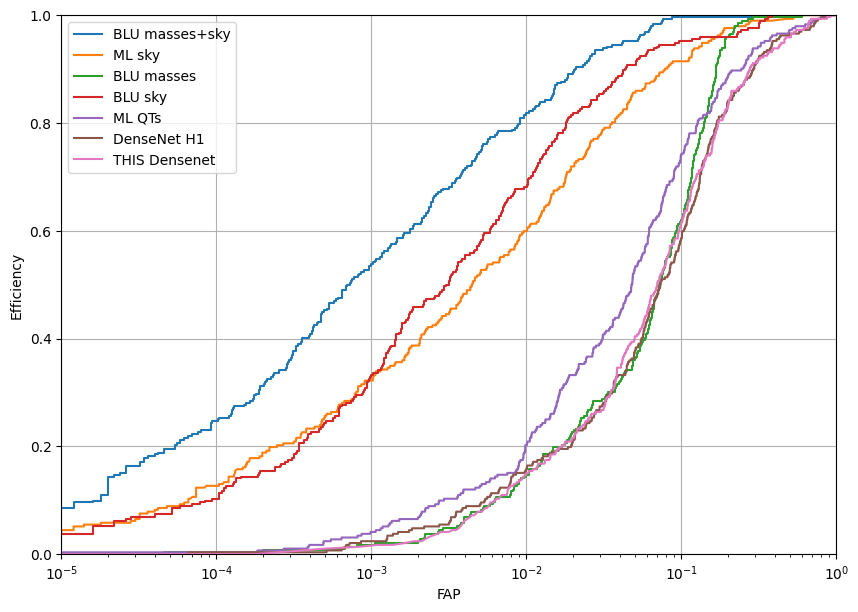

In [40]:
columns = ['m1, m2, ra, sin_dec, costheta_jn','xgb_pred_bayestar_skymaps','m1, m2','ra, sin_dec','xgb_dense_QTS_0','dense_H1_0','dense_H1']
labels=['BLU masses+sky','ML sky','BLU masses','BLU sky','ML QTs','DenseNet H1','THIS Densenet']
fig,rocs=ml.plot_ROCs(df_test,cols=columns,labels=labels)

In [41]:
fig.savefig('dense_H1_ROCs_haris_etal.png')


In [ ]:
#np.logspace(-4,0.4,100)